<a href="https://www.kaggle.com/code/vanitech8/amity-placement-model-ml?scriptVersionId=205933571" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/college-placement/placement-dataset.csv


# Amity University Placement model ML

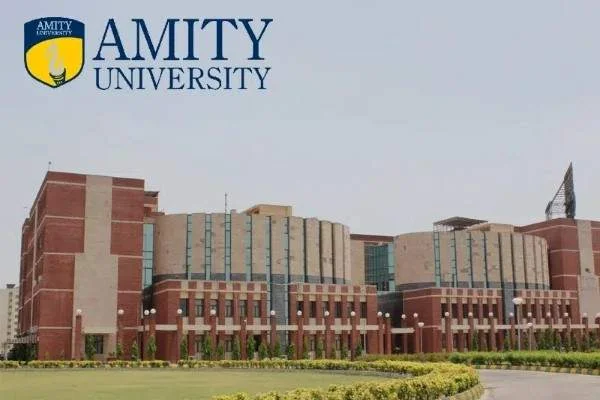

# Import Library

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import Data 

In [3]:
df = pd.read_csv('/kaggle/input/college-placement/placement-dataset.csv')
df = df.drop("Unnamed: 0", axis=1)
df

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0
...,...,...,...
95,4.3,200.0,0
96,4.4,42.0,0
97,6.7,182.0,1
98,6.3,103.0,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   cgpa       100 non-null    float64
 1   iq         100 non-null    float64
 2   placement  100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [5]:
df.describe()

,cgpa,iq,placement
count,100.000000,100.000000,100.000000
mean,5.991000,123.580000,0.500000
std,1.143634,39.944198,0.502519
min,3.300000,37.000000,0.000000
25%,5.075000,101.500000,0.000000
50%,6.000000,127.500000,0.500000
75%,6.900000,149.000000,1.000000
max,8.500000,233.000000,1.000000


# def target (y) and features (x)

In [6]:
df.columns

Index(['cgpa', 'iq', 'placement'], dtype='object')

In [7]:
y = df['placement']
X = df.drop([ 'placement' ], axis=1)

In [8]:
df.shape

(100, 3)

# Exploratory Data Analysis (EDA)

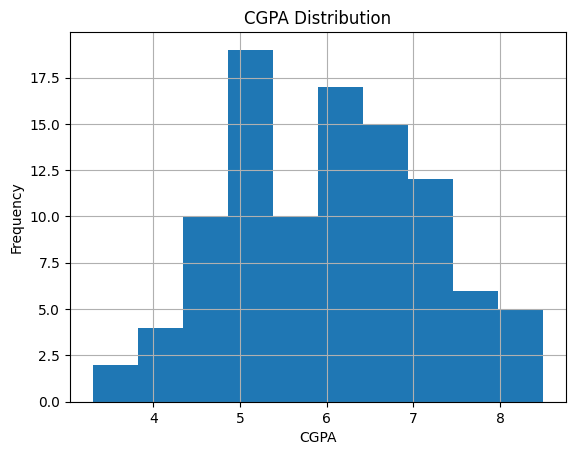

In [9]:
df['cgpa'].hist()
plt.title('CGPA Distribution')
plt.xlabel('CGPA')
plt.ylabel('Frequency')
plt.show()

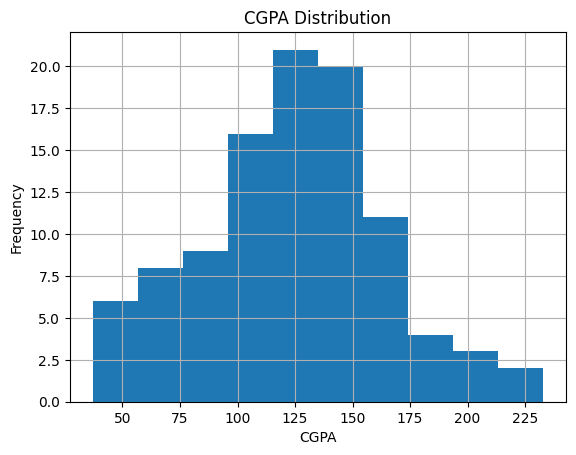

In [10]:
df['iq'].hist()
plt.title('CGPA Distribution')
plt.xlabel('CGPA')
plt.ylabel('Frequency')
plt.show()

In [11]:
correlation = df['cgpa'].corr(df['iq'])

print("The correlation coefficient between CGPA and IQ is:", correlation)

The correlation coefficient between CGPA and IQ is: -0.0987906720582117


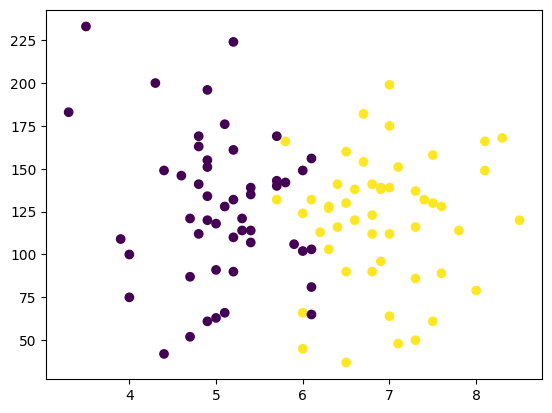

In [12]:
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])

In [13]:
x = df.iloc[: ,0:2]
y =  df.iloc[:,-1]

In [14]:
x

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [15]:
y

0     1
1     0
2     0
3     1
4     0
     ..
95    0
96    0
97    1
98    1
99    1
Name: placement, Length: 100, dtype: int64

In [16]:
y.shape

(100,)

# Split the Data

In [17]:
from sklearn.model_selection import train_test_split
x_train ,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.1)


In [18]:
x_train

,cgpa,iq
50,3.5,233.0
39,4.6,146.0
9,5.1,66.0
78,6.1,81.0
92,5.2,110.0
...,...,...
98,6.3,103.0
15,5.1,176.0
83,7.5,130.0
86,5.1,128.0


In [19]:
x_test

,cgpa,iq
24,4.7,121.0
0,6.8,123.0
84,5.7,169.0
61,7.3,137.0
64,7.0,64.0
36,5.7,140.0
8,6.1,156.0
71,6.1,132.0
89,4.9,151.0
3,7.4,132.0


In [20]:
y_train

50    0
39    0
9     0
78    0
92    0
     ..
98    1
15    0
83    1
86    0
74    1
Name: placement, Length: 90, dtype: int64

In [21]:
y_test

24    0
0     1
84    0
61    1
64    1
36    0
8     0
71    1
89    0
3     1
Name: placement, dtype: int64

In [22]:
from sklearn.preprocessing import StandardScaler 

In [23]:
scaler = StandardScaler()

In [24]:
x_train = scaler.fit_transform(x_train)

In [25]:
x_train

array([[-2.13096434,  2.70580985],
       [-1.18237859,  0.57372863],
       [-0.75120326, -1.38680583],
       [ 0.11114742, -1.01920562],
       [-0.66496819, -0.30851188],
       [ 0.45608769, -0.79864549],
       [ 1.31843837, -1.50933924],
       [-0.57873312, -0.21048516],
       [-0.14755778,  0.4757019 ],
       [-0.92367339,  1.79906266],
       [-0.83743832, -0.11245843],
       [ 0.11114742, -0.48005865],
       [ 0.9734981 ,  0.69626203],
       [-1.00990846,  0.9903422 ],
       [ 2.18078904, -0.06344507],
       [-2.30343447,  1.48047581],
       [ 1.14596823, -1.77891272],
       [ 0.80102796,  0.37767518],
       [-1.00990846,  1.13738228],
       [-0.49249805,  0.30415514],
       [ 1.83584877,  0.64724867],
       [-0.66496819,  0.2306351 ],
       [-1.35484873, -1.97496617],
       [-0.66496819,  2.48524972],
       [-0.83743832, -0.77413881],
       [-1.78602407, -0.33301856],
       [-1.699789  , -1.16624571],
       [ 0.9734981 , -1.82792608],
       [ 0.02491235,

In [26]:
x_test =scaler.transform(x_test)

In [27]:
x_test

array([[-1.09614353, -0.03893839],
       [ 0.71479289,  0.01007497],
       [-0.23379285,  1.13738228],
       [ 1.14596823,  0.3531685 ],
       [ 0.88726303, -1.43581919],
       [-0.23379285,  0.42668854],
       [ 0.11114742,  0.81879543],
       [ 0.11114742,  0.2306351 ],
       [-0.92367339,  0.69626203],
       [ 1.2322033 ,  0.2306351 ]])

# select model (import logistic regression)

In [28]:
from sklearn.linear_model import LogisticRegression

In [29]:
clf = LogisticRegression()

In [30]:
clf.fit(x_train,y_train)

LogisticRegression()

# prediction model

In [31]:
from sklearn.linear_model import LogisticRegression

# Initialize the model
clf = LogisticRegression()

# Fit the model to the training data
clf.fit(x_train, y_train)  # Make sure x_train and y_train are correctly defined and preprocessed

# Now you can make predictions on the test data
y_pred = clf.predict(x_test)

In [32]:
y_test

24    0
0     1
84    0
61    1
64    1
36    0
8     0
71    1
89    0
3     1
Name: placement, dtype: int64

# model accuracy

In [33]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
confusion_matrix (y_test, y_pred)

array([[4, 1],
       [0, 5]])

In [34]:
accuracy_score(y_test,y_pred)

0.9

Accuracy: 0.9
Confusion Matrix:
 [[10  0]
 [ 2  8]]


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


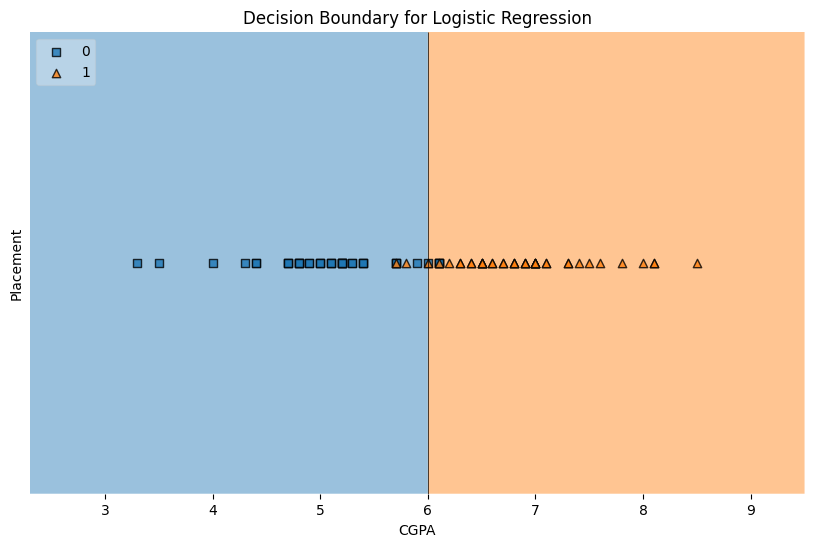

In [35]:
from mlxtend.plotting import plot_decision_regions

# Prepare the features and target variable
X = df[['cgpa']]  # Using only 'cgpa' as the feature
y = df['placement']  # Target variable

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print out the accuracy and confusion matrix
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)

# Convert X_train and y_train to NumPy arrays for the plotting function
X_train_np = X_train.to_numpy()
y_train_np = y_train.to_numpy()

# Visualizing the decision boundary
plt.figure(figsize=(10, 6))
plot_decision_regions(X_train_np, y_train_np, clf=model, legend=2)
plt.xlabel('CGPA')
plt.ylabel('Placement')
plt.title('Decision Boundary for Logistic Regression')
plt.show()

In [36]:
X = df[['iq']]  # Features
y = df['placement']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.4
Confusion Matrix:
 [[4 6]
 [6 4]]


IQ is a terrible predictor.

In [37]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix

X = df[['cgpa']]  # Features
y = df['placement']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
model = LogisticRegression()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.95
Confusion Matrix:
 [[ 9  1]
 [ 0 10]]


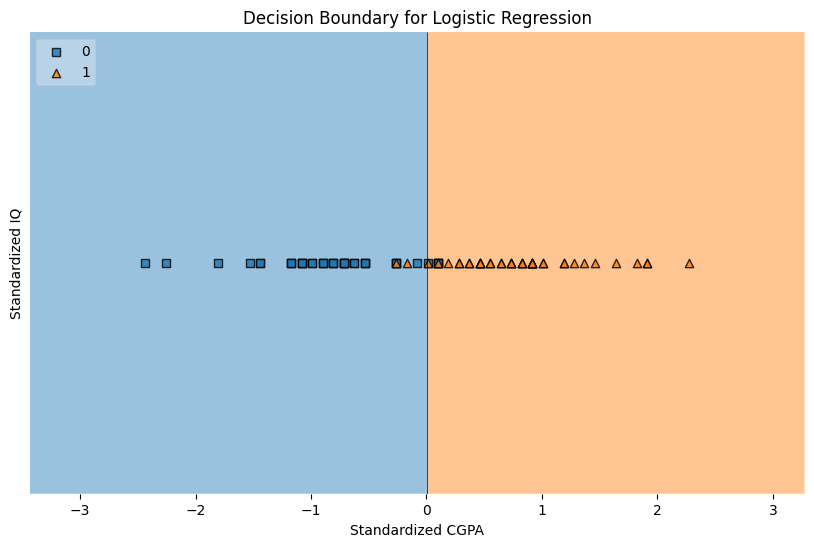

In [38]:
from mlxtend.plotting import plot_decision_regions

# Assuming you've scaled your features as X_train_scaled and you have y_train from before
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# No need to convert to NumPy arrays since they already are
X_train_np = X_train_scaled  # Already a NumPy array
y_train_np = y_train.to_numpy()  # Convert y_train to a NumPy array if it's not already

# Plotting
plt.figure(figsize=(10, 6))
plot_decision_regions(X_train_np, y_train_np, clf=model, legend=2)
plt.xlabel('Standardized CGPA')
plt.ylabel('Standardized IQ')
plt.title('Decision Boundary for Logistic Regression')
plt.show()

Accuracy: 0.85
Confusion Matrix:
 [[9 1]
 [2 8]]


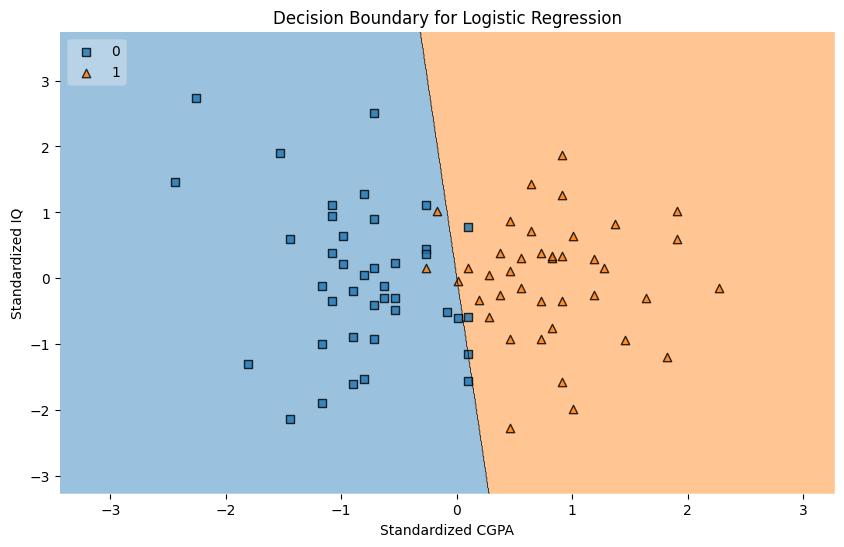

In [39]:
X = df[['cgpa','iq']]  # Features
y = df['placement']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
model = LogisticRegression()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)

# Assuming you've scaled your features as X_train_scaled and you have y_train from before
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# No need to convert to NumPy arrays since they already are
X_train_np = X_train_scaled  # Already a NumPy array
y_train_np = y_train.to_numpy()  # Convert y_train to a NumPy array if it's not already

# Plotting
plt.figure(figsize=(10, 6))
plot_decision_regions(X_train_np, y_train_np, clf=model, legend=2)
plt.xlabel('Standardized CGPA')
plt.ylabel('Standardized IQ')
plt.title('Decision Boundary for Logistic Regression')
plt.show()

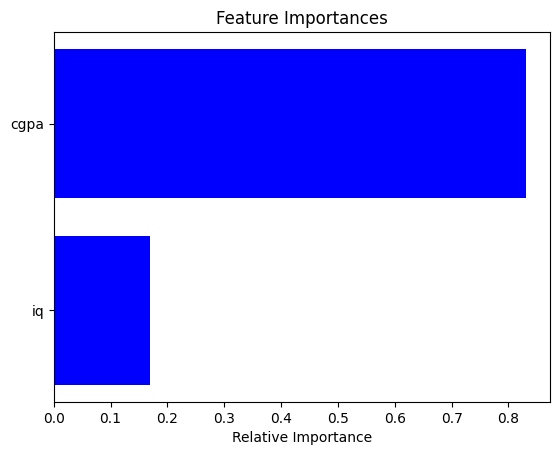

In [40]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Assume X and y are already defined and split into train and test sets
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Get and visualize feature importances
importances = model.feature_importances_
indices = np.argsort(importances)
features = X_train.columns

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()


In [41]:
importances

array([0.83112139, 0.16887861])

IQ doesnt matter much

In [42]:
from sklearn.svm import SVC
X = df[['cgpa','iq']]  # Using only 'cgpa' as the feature for simplicity
y = df['placement']  # Target variable
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
model = SVC(kernel='linear')  # You can try other kernels like 'rbf'
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print out the accuracy and confusion matrix
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.95
Confusion Matrix:
 [[ 9  1]
 [ 0 10]]


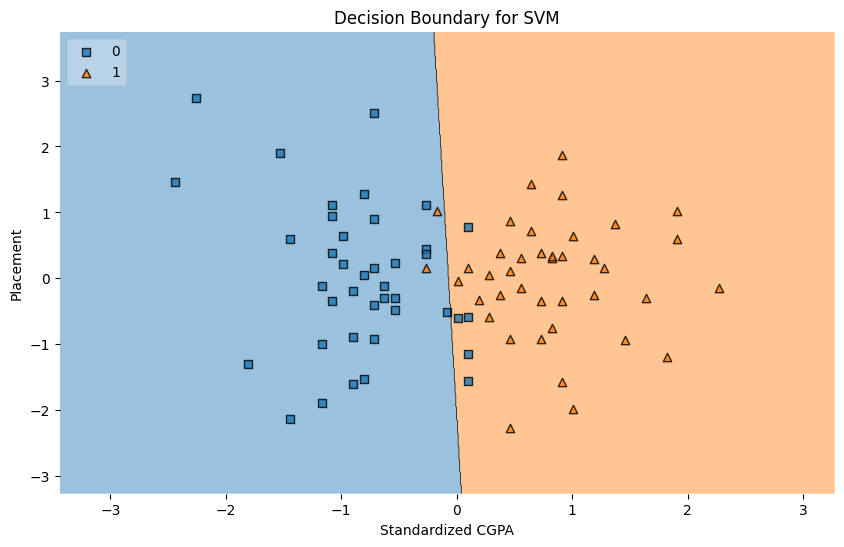

In [43]:
plt.figure(figsize=(10, 6))
plot_decision_regions(X_train_scaled, y_train.values, clf=model, legend=2)
plt.xlabel('Standardized CGPA')
plt.ylabel('Placement')
plt.title('Decision Boundary for SVM')
plt.show()

In [44]:
from sklearn.neighbors import KNeighborsClassifier

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
model = KNeighborsClassifier(n_neighbors=5)  # You can experiment with the number of neighbors
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print out the accuracy and confusion matrix
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.9
Confusion Matrix:
 [[10  0]
 [ 2  8]]


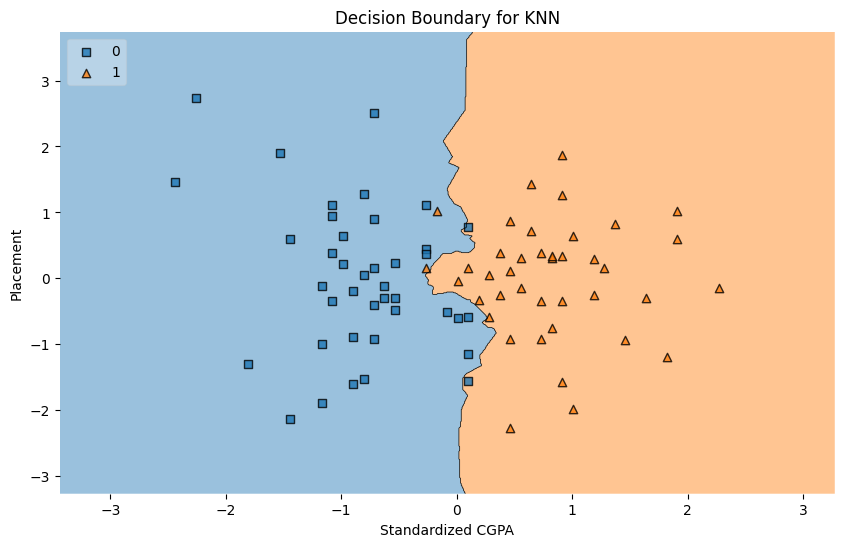

In [45]:
plt.figure(figsize=(10, 6))
plot_decision_regions(X_train_scaled, y_train.values, clf=model, legend=2)
plt.xlabel('Standardized CGPA')
plt.ylabel('Placement')
plt.title('Decision Boundary for KNN')
plt.show()

Accuracy: 0.9
Confusion Matrix:
 [[10  0]
 [ 2  8]]


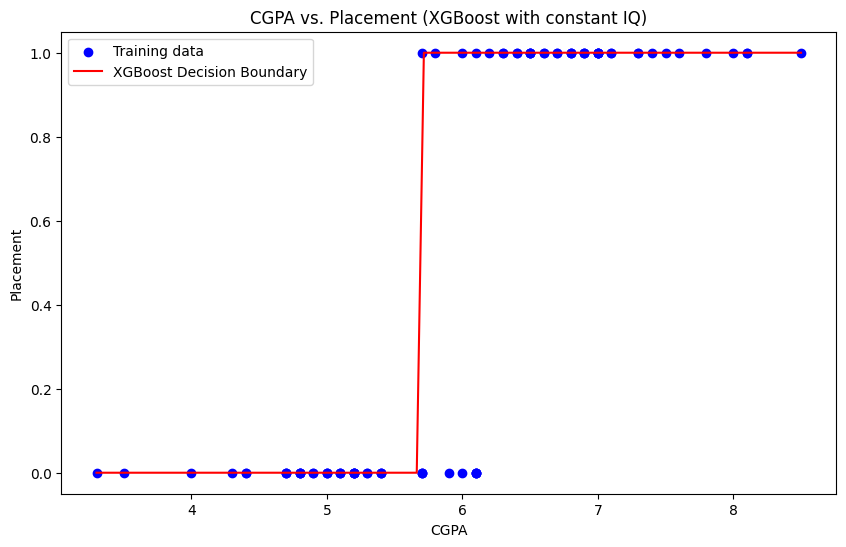

In [46]:
import xgboost as xgb

X = df[['cgpa', 'iq']]  # Using both 'cgpa' and 'iq' as features
y = df['placement']  # Target variable

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the XGBoost model
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print out the accuracy and confusion matrix
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)

# Visualization
# Choose a representative value for 'iq' (e.g., the mean)
mean_iq = X_train['iq'].mean()

# Generate a sequence of CGPA values from the min to max range
cgpa_range = np.linspace(X_train['cgpa'].min(), X_train['cgpa'].max(), 100).reshape(-1, 1)

# Create a 2D array combining 'cgpa_range' and the constant 'iq' value
combined_input = np.hstack((cgpa_range, np.full_like(cgpa_range, mean_iq)))

# Predict placement for these CGPA and constant IQ values
predicted_placement = model.predict(combined_input)

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(X_train['cgpa'], y_train, color='blue', label='Training data')
plt.plot(cgpa_range, predicted_placement, color='red', label='XGBoost Decision Boundary')
plt.xlabel('CGPA')
plt.ylabel('Placement')
plt.title('CGPA vs. Placement (XGBoost with constant IQ)')
plt.legend()
plt.show()

# Conclusion 
Overall, this dataset serves as a useful resource for both students and the placement cell at Amity. By understanding these patterns, students can better prepare themselves for the job market, while the placement cell can identify areas for improvement, enhancing support and preparation strategies to boost placement rates and meet industry demands.



Author

Shivani Sharma
MCA AI|ML
